# S02 T05: Exploració de les dades

**Descripció**

Familiaritza't amb les tècniques d'exploració de les dades mitjantçant la estructura de dades, Dataframe amb la llibreria Pandas. 

In this notebook I will do an Exploratory Data Analysis of the dataset about the on-time performance of domestic flights operated by large air carriers. The dataset can be found in Kaggle: https://www.kaggle.com/giovamata/airlinedelaycauses. The data comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS).

The first part of the notebook consists of the understanding and preparation of the data.

In the second part of the notebook I will use the data do some calculations and try to extract some useful insights. 

### Exercici 1

* Import of modules for data analysis
* Loading the dataset
* Description of the variables
* Inspection of the data (info, shape, missing data, duplicates, summary statistics)
* Delete columns and rows

In [1]:
# Import of basic modules to do the data exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Save the csv file into a DataFrame

flights = pd.read_csv("DelayedFlights.csv", index_col=0)

#### Names of the variables of the dataset

In [3]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

#### Variables of the dataset. Name and description

<br>
<table align="left">
  <tr>
    <th></th>
    <th style="text-align:left">Variable Name</th>
    <th style="text-align:left">Description</th>
  </tr>
  <tr>
    <td>1.</td>
    <td style="text-align:left">Year</td>
    <td style="text-align:left">2008</td>
  </tr>
  <tr>
    <td>2.</td>
    <td style="text-align:left">Month</td>
    <td style="text-align:left">1-12</td>
  </tr>
  <tr>
    <td>3.</td>
    <td style="text-align:left">DayofMonth</td>
    <td style="text-align:left">1-31</td>
  </tr>
  <tr>
    <td>4.</td>
    <td style="text-align:left">DayOfWeek</td>
    <td style="text-align:left">1 (Monday) - 7 (Sunday)</td>
  </tr>
  <tr>
    <td>5.</td>
    <td style="text-align:left">DepTime</td>
    <td style="text-align:left">actual departure time (local, hhmm)</td>
  </tr>
  <tr>
    <td>6.</td>
    <td style="text-align:left">CRSDepTime</td>
    <td style="text-align:left">scheduled departure time (local, hhmm)</td>
  </tr>
  <tr>
    <td>7.</td>
    <td style="text-align:left">ArrTime</td>
    <td style="text-align:left">actual arrival time (local, hhmm)</td>
  </tr>
  <tr>
    <td>8.</td>
    <td style="text-align:left">CRSArrTime</td>
    <td style="text-align:left">scheduled arrival time (local, hhmm)</td>
  </tr>
  <tr>
    <td>9.</td>
    <td style="text-align:left">UniqueCarrier</td>
    <td style="text-align:left">unique carrier code</td>
  </tr>
  <tr>
    <td>10.</td>
    <td style="text-align:left">FlightNum</td>
    <td style="text-align:left">flight number</td>
  </tr>
  <tr>
    <td>11.</td>
    <td style="text-align:left">TailNum</td>
    <td style="text-align:left">plane tail number: aircraft registration, unique aircraft identifier</td>
  </tr>
  <tr>
    <td>12.</td>
    <td style="text-align:left">ActualElapsedTime</td>
    <td style="text-align:left">in minutes</td>
  </tr>
  <tr>
    <td>13.</td>
    <td style="text-align:left">CRSElapsedTime</td>
    <td style="text-align:left">in minutes</td>
  </tr>
  <tr>
    <td>14.</td>
    <td style="text-align:left">AirTime</td>
    <td style="text-align:left">in minutes</td>
  </tr>
  <tr>
    <td>15.</td>
    <td style="text-align:left">ArrDelay</td>
    <td style="text-align:left">arrival delay, in minutes</td>
  </tr>
  <tr>
    <td>16.</td>
    <td style="text-align:left">DepDelay</td>
    <td style="text-align:left">departure delay, in minutes</td>
  </tr>
  <tr>
    <td>17.</td>
    <td style="text-align:left">Origin</td>
    <td style="text-align:left">origin IATA airport code</td>
  </tr>
  <tr>
    <td>18.</td>
    <td style="text-align:left">Dest</td>
    <td style="text-align:left">destination IATA airport code</td>
  </tr>
  <tr>
    <td>19.</td>
    <td style="text-align:left">Distance</td>
    <td style="text-align:left">in miles</td>
  </tr>
  <tr>
    <td>20.</td>
    <td style="text-align:left">TaxiIn</td>
    <td style="text-align:left">taxi in time, in minutes</td>
  </tr>
  <tr>
    <td>21.</td>
    <td style="text-align:left">TaxiOut</td>
    <td style="text-align:left">taxi out time in minutes</td>
  </tr>
    <tr>
    <td>22.</td>
    <td style="text-align:left">Cancelled</td>
    <td style="text-align:left">1 = yes, 0 = no</td>
  </tr>
  <tr>
    <td>23.</td>
    <td style="text-align:left">CancellationCode</td>
    <td style="text-align:left">reason for cancellation (A = carrier, B = weather, C = NAS, D = security)</td>
  </tr>
  <tr>
    <td>24.</td>
    <td style="text-align:left">Diverted</td>
    <td style="text-align:left">1 = yes, 0 = no</td>
  </tr>
    <tr>
    <td>25.</td>
    <td style="text-align:left">CarrierDelay</td>
    <td style="text-align:left">in minutes: Carrier delay is within the control of the air carrier.</td>
  </tr>
  <tr>
    <td>26.</td>
    <td style="text-align:left">WeatherDelay</td>
    <td style="text-align:left">in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.</td>
  </tr>
  <tr>
    <td>27.</td>
    <td style="text-align:left">NASDelay</td>
    <td style="text-align:left">in minutes: Delay that is within the control of the National Airspace System (NAS)</td>
  </tr>
  <tr>
    <td>28.</td>
    <td style="text-align:left">SecurityDelay</td>
    <td style="text-align:left">in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.</td>
  </tr>
  <tr>
    <td>29.</td>
    <td style="text-align:left">LateAircraftDelay</td>
    <td style="text-align:left">in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport.</td>
  </tr>
</table> 

#### Look at the first 5 rows of the DataSet to have a general idea of the data

In [4]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


#### Get the general info to see the column names, the count and type of the columns

We can see that there are 1936758 entries and 29 columns. We can also the data type of each column and that there are missing values in some columns, specially in the last five.

In [5]:
flights.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1936758 non-null  int64  
 1   Month              1936758 non-null  int64  
 2   DayofMonth         1936758 non-null  int64  
 3   DayOfWeek          1936758 non-null  int64  
 4   DepTime            1936758 non-null  float64
 5   CRSDepTime         1936758 non-null  int64  
 6   ArrTime            1929648 non-null  float64
 7   CRSArrTime         1936758 non-null  int64  
 8   UniqueCarrier      1936758 non-null  object 
 9   FlightNum          1936758 non-null  int64  
 10  TailNum            1936753 non-null  object 
 11  ActualElapsedTime  1928371 non-null  float64
 12  CRSElapsedTime     1936560 non-null  float64
 13  AirTime            1928371 non-null  float64
 14  ArrDelay           1928371 non-null  float64
 15  DepDelay           1936758 non-n

#### Deleting rows and columns

In the second part of this notebook I want to analyse some aspects related to carrier delays and distance. I can see that I don´t need many of the columns, like the info about Taxis or the causes of the delays. For this reason I will delete them so I can work with a reduced dataset

In [6]:
flights_reduced = flights.drop(['TailNum', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 
                                'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
                                'CRSDepTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime','DepDelay'], axis=1)
flights_reduced.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,AirTime,ArrDelay,Origin,Dest,Distance
0,2008,1,3,4,2003.0,2211.0,WN,335,116.0,-14.0,IAD,TPA,810
1,2008,1,3,4,754.0,1002.0,WN,3231,113.0,2.0,IAD,TPA,810
2,2008,1,3,4,628.0,804.0,WN,448,76.0,14.0,IND,BWI,515
4,2008,1,3,4,1829.0,1959.0,WN,3920,77.0,34.0,IND,BWI,515
5,2008,1,3,4,1940.0,2121.0,WN,378,87.0,11.0,IND,JAX,688


#### Looking for duplicates



In [7]:
flights_reduced[flights_reduced.duplicated(keep=False)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,AirTime,ArrDelay,Origin,Dest,Distance
938224,2008,2,28,4,1854.0,1946.0,F9,773,91.0,44.0,DEN,LAS,629
938225,2008,2,28,4,1854.0,1946.0,F9,773,91.0,44.0,DEN,LAS,629
938226,2008,2,28,4,2027.0,2314.0,F9,780,84.0,45.0,LAS,DEN,629
938227,2008,2,28,4,2027.0,2314.0,F9,780,84.0,45.0,LAS,DEN,629


I found that there are only two duplicated rows. I decide to delete them

In [8]:
flights_reduced.drop_duplicates(inplace=True)

#### Looking for missing values

In [9]:
# Get the columns with missing values and their sum
null_cols = flights_reduced.columns[flights_reduced.isnull().sum() > 0]
flights_reduced[null_cols].isnull().sum()

ArrTime     7110
AirTime     8387
ArrDelay    8387
dtype: int64

I can see that there are only 3 columns with missing values in my reduced dataset. I can also see that there are not a great number compared to the almost 2 million entries of the dataset. I think that I can delete these rows in order to work only with non-null values. But first I want to check which percentage of the data they represent to see if they are significative 

In [10]:
# Get percentage of null values compared with the entire dataset
round(flights_reduced[null_cols].isnull().sum() * 100 / flights_reduced.shape[0], 2)

ArrTime     0.37
AirTime     0.43
ArrDelay    0.43
dtype: float64

As I thought, they don´t seem very significative because they are only a bit more than 1% of the data. I think that I can remove them without having a great impact on the data.

In [11]:
flights_reduced = flights_reduced.dropna()

#### Summary statistics

Before starting with the data manipulation I want to take a look at the summary statistics

In [12]:
flights_reduced.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,AirTime,ArrDelay,Distance
count,1928369.0,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06,1.928369e+06
mean,2008.0,6.107859e+00,1.575205e+01,3.984999e+00,1.518647e+03,1.610242e+03,2.184298e+03,1.082772e+02,4.219988e+01,7.649487e+02
std,0.0,3.480752e+00,8.776562e+00,1.996051e+00,4.504352e+02,5.480009e+02,1.944450e+03,6.864264e+01,5.678474e+01,5.738860e+02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.090000e+02,1.100000e+01
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.316000e+03,6.110000e+02,5.800000e+01,9.000000e+00,3.380000e+02
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.715000e+03,1.543000e+03,9.000000e+01,2.400000e+01,6.060000e+02
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,2.030000e+03,3.423000e+03,1.370000e+02,5.600000e+01,9.970000e+02
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,9.741000e+03,1.091000e+03,2.461000e+03,4.962000e+03


I can see that there are some values that are not logical. The minimun value in the **AirTime** column is 0. It´s impossible that a flight can last 0 minutes, that would mean that it never took off. I found that the shortest commercial route in the world is performed in less than 1 minute (https://en.wikipedia.org/wiki/Westray_to_Papa_Westray_flight) but I think this is a funny exception. In general, I found out that the shortest flights durations are between 15 and 20 minutes. For this reason I decided to drop from the dataset all flights that have an AirTime value of less than 20 minutes

In [13]:
flights_reduced = flights_reduced.drop(flights_reduced[flights_reduced.AirTime < 20].index)

#### Final dataset

After deleting some columns and rows our dataset has 15441 rows and 17 columns less than the original

In [14]:
print("The original dataset had {} rows and {} columns.".format(flights.shape[0], flights.shape[1]))
print("The reduced dataset has {} rows and {} columns.".format(flights_reduced.shape[0], flights_reduced.shape[1]))
print("{} rows and {} columns were deleted.".format(flights.shape[0]-flights_reduced.shape[0],
                                                   flights.shape[1]-flights_reduced.shape[1]))

The original dataset had 1936758 rows and 29 columns.
The reduced dataset has 1921317 rows and 13 columns.
15441 rows and 16 columns were deleted.


### Exercici 2

* Add new columns (Average speed of flight, Delayed flights...)
* Table of carriers with more accumulated delays
* Longest flights
* More delayed flights

#### New column: AvgSpeed

Add a column for the average speed of the flights

In [15]:
# Average speed in miles per hour
flights_reduced["AvgSpeed"] = 60 * flights_reduced["Distance"] / flights_reduced["AirTime"]
flights_reduced[["UniqueCarrier", "Origin", "Dest", "AirTime", "Distance", "AvgSpeed"]].head(10)

,UniqueCarrier,Origin,Dest,AirTime,Distance,AvgSpeed
0,WN,IAD,TPA,116.0,810,418.965517
1,WN,IAD,TPA,113.0,810,430.088496
2,WN,IND,BWI,76.0,515,406.578947
4,WN,IND,BWI,77.0,515,401.298701
5,WN,IND,JAX,87.0,688,474.482759
6,WN,IND,LAS,230.0,1591,415.043478
10,WN,IND,MCO,106.0,828,468.679245
11,WN,IND,MCO,107.0,828,464.299065
15,WN,IND,MDW,37.0,162,262.702703
16,WN,IND,PHX,213.0,1489,419.436620


In [16]:
avg_speed = flights_reduced.groupby("UniqueCarrier")["AvgSpeed"].mean().reset_index()

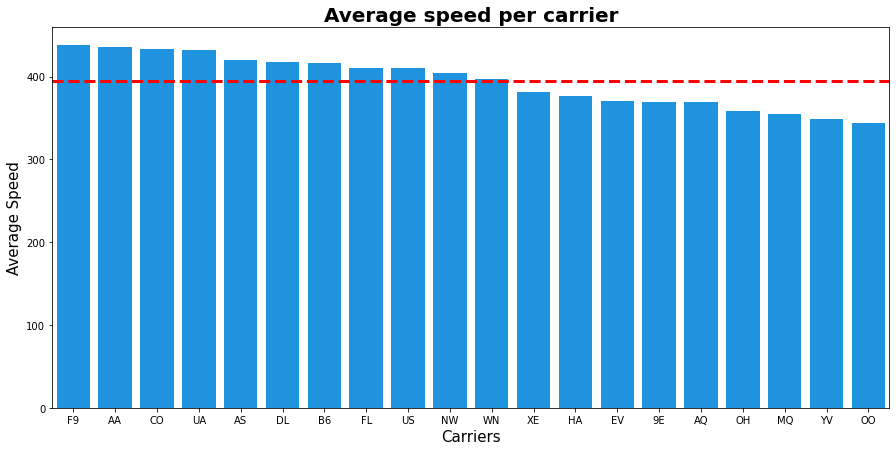

In [17]:
plt.figure(figsize=(15,7))

ax = sns.barplot(x="UniqueCarrier", y="AvgSpeed", data=avg_speed.sort_values(by="AvgSpeed", ascending=False), palette=["#0099ff"])
ax.axhline(np.mean(avg_speed["AvgSpeed"]), ls="dashed", c="r", lw=3)

ax.set_title("Average speed per carrier", fontsize="20", weight="bold")
ax.set_xlabel("Carriers", fontsize="15")
ax.set_ylabel("Average Speed", fontsize="15")

plt.show()

#### New column: Delayed

Add a column with boolean values to show if the flight was delayed: False = no; True = yes

In [18]:
# Average speed in miles per hour
flights_reduced["Delayed"] = flights["ArrDelay"] > 0
flights_reduced[["UniqueCarrier","Origin", "Dest", "ArrDelay", "Delayed"]].head(10)

,UniqueCarrier,Origin,Dest,ArrDelay,Delayed
0,WN,IAD,TPA,-14.0,False
1,WN,IAD,TPA,2.0,True
2,WN,IND,BWI,14.0,True
4,WN,IND,BWI,34.0,True
5,WN,IND,JAX,11.0,True
6,WN,IND,LAS,57.0,True
10,WN,IND,MCO,1.0,True
11,WN,IND,MCO,80.0,True
15,WN,IND,MDW,11.0,True
16,WN,IND,PHX,15.0,True


In [19]:
# Plot the total flights and total delayed flights per carrier

# Get total flights per carrier
f1 = pd.DataFrame(flights_reduced["UniqueCarrier"].value_counts())

# Get total delayed flights per carrier
f2 = flights_reduced[flights_reduced["Delayed"] == True].groupby("UniqueCarrier")["Delayed"].value_counts().rename("count").reset_index().set_index("UniqueCarrier")

# Join the 2 datasets to use it with seaborn
f3 = f1.join(f2["count"])

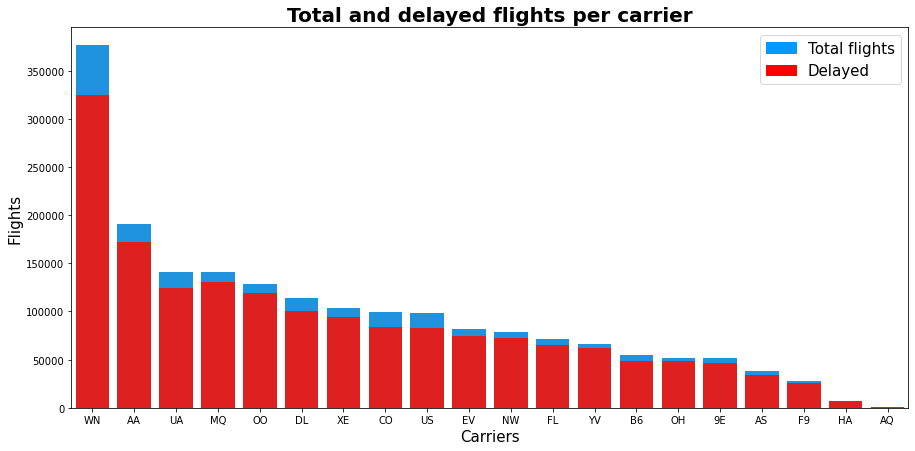

In [20]:
plt.figure(figsize=(15,7))

ax = sns.barplot(x=f3.index, y=f3["UniqueCarrier"], data=f3, color = "#0099ff")

ax = sns.barplot(x=f3.index, y=f3["count"], data=f3, color = "red")

# Set title and axis
ax.set_title("Total and delayed flights per carrier", fontsize="20", weight="bold")
ax.set_xlabel("Carriers", fontsize="15")
ax.set_ylabel("Flights", fontsize="15")

# add legend
top_bar = mpatches.Patch(color='#0099ff', label='Total flights')
bottom_bar = mpatches.Patch(color='red', label='Delayed')
plt.legend(handles=[top_bar, bottom_bar], fontsize="15")

plt.show()

#### Table of carriers with more accumulated delays

My first thought was to group the dataset by _UniqueCarriers_ and get the sum of the times stored in the column _ArrDelay_. But then I saw that there are negative times for flights that arrived before the estimated time. For this reason I decided to filter the dataset using the new created _Delayed_ column to get only the flights that arrived with delay before grouping by Carrier and summing the total times. 

In [21]:
del_flights = flights_reduced["Delayed"] == 1
flights_reduced[del_flights].groupby("UniqueCarrier")["ArrDelay"].sum().sort_values(ascending = False).head(10)

UniqueCarrier
WN    11609168.0
AA     9004018.0
UA     6849343.0
MQ     6418347.0
OO     5914884.0
XE     5224540.0
DL     4620687.0
CO     4159638.0
EV     3902307.0
US     3678069.0
Name: ArrDelay, dtype: float64

In [22]:
acum_delay = flights_reduced[del_flights].groupby("UniqueCarrier")["ArrDelay"].sum().sort_values(ascending = False).head(10)

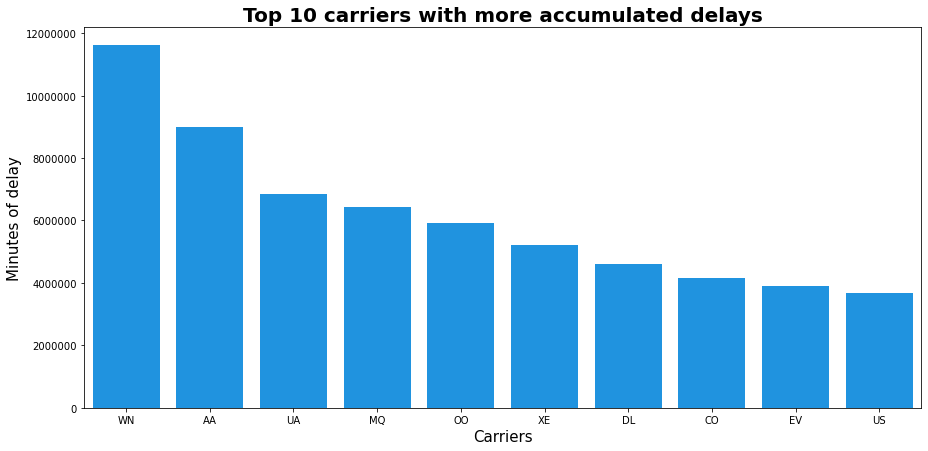

In [23]:
plt.figure(figsize=(15,7))

ax = sns.barplot(x=acum_delay.index, y=acum_delay.values, color = "#0099ff")

# Set title and axis
ax.set_title("Top 10 carriers with more accumulated delays", fontsize="20", weight="bold")
ax.set_xlabel("Carriers", fontsize="15")
ax.set_ylabel("Minutes of delay", fontsize="15")

ax.ticklabel_format(style="plain", axis="y")

plt.show()

#### Table of longest flights

I added a _TotalTime_ column to the dataset that it's the difference between _ArrTime_ and _DepTime_. Then I show a table sorted by the values of the new column 

In [24]:
flights_reduced["TotalTime"] = flights_reduced["ArrTime"] - flights_reduced["DepTime"]
long_flights = flights_reduced[["UniqueCarrier","Origin", "Dest", "Distance", "TotalTime"]].sort_values(by="TotalTime", ascending=False)
long_flights.head(10)

,UniqueCarrier,Origin,Dest,Distance,TotalTime
6539523,WN,PHX,LAS,256,2397.0
3940676,EV,ATL,PFN,247,2392.0
6082368,OH,ATL,BHM,134,2385.0
4215806,DL,ATL,BHM,134,2377.0
3931106,DL,ATL,BHM,134,2357.0
6615130,OH,ATL,BHM,134,2354.0
3927916,DL,ATL,BNA,214,2351.0
893950,DL,ATL,HSV,151,2348.0
3939645,EV,ATL,DHN,171,2348.0
1484706,DL,ATL,BHM,134,2347.0


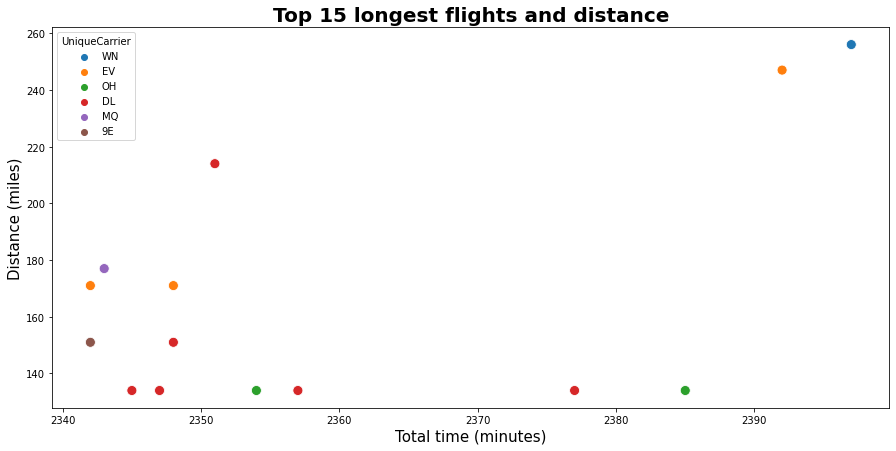

In [25]:
plt.figure(figsize=(15,7))

ax = sns.scatterplot(x="TotalTime", y="Distance", hue="UniqueCarrier", data = long_flights.head(15), s=100)

# Set title and axis
ax.set_title("Top 15 longest flights and distance", fontsize="20", weight="bold")
ax.set_xlabel("Total time (minutes)", fontsize="15")
ax.set_ylabel("Distance (miles)", fontsize="15")

plt.show()

#### Table of most delayed flights

In [26]:
most_delayed = flights_reduced[["UniqueCarrier","Origin", "Dest", "Distance", "ArrDelay"]].sort_values(by="ArrDelay", ascending=False)
most_delayed.head(10)

,UniqueCarrier,Origin,Dest,Distance,ArrDelay
1018798,NW,HNL,MSP,3972,2461.0
2235378,NW,CLT,MSP,930,2453.0
2832617,NW,RSW,DTW,1085,1951.0
3387883,MQ,LIT,DFW,304,1707.0
6857047,NW,BOS,MSP,1124,1655.0
5232546,NW,OMA,MSP,282,1583.0
2232494,NW,MOT,MSP,449,1542.0
527950,AA,EGE,MIA,1811,1525.0
4061361,NW,SEA,MSP,1399,1510.0
1634129,NW,BNA,MEM,200,1490.0


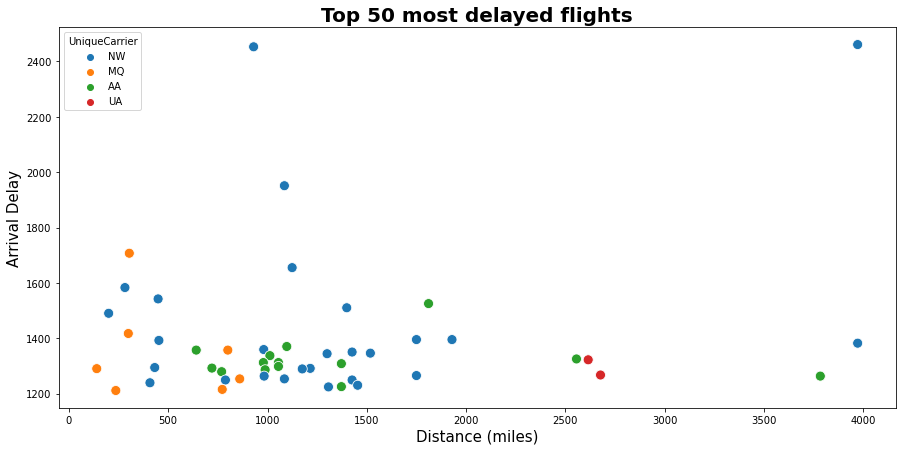

In [27]:
plt.figure(figsize=(15,7))

ax = sns.scatterplot(x="Distance", y="ArrDelay", hue="UniqueCarrier", data = most_delayed.head(50), s=100)

# Set title and axis
ax.set_title("Top 50 most delayed flights", fontsize="20", weight="bold")
ax.set_xlabel("Distance (miles)", fontsize="15")
ax.set_ylabel("Arrival Delay", fontsize="15")

plt.show()